<a href="https://colab.research.google.com/github/AdieshwarReddy/2311cs020426-AL-ML-daily-programs-/blob/main/Water_Probability_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**:
Access to clean water is a fundamental human necessity, and understanding water quality is critical for ensuring public health and environmental sustainability. The goal of this project is to develop a predictive model that can accurately forecast water quality based on various chemical and physical parameters. The model will utilize machine learning techniques to analyze data from water sources and predict the Water Quality Index (WQI) and categorize water quality into different levels (e.g., Good, Poor, Unsuitable for Drinking).

**About Columns**:

**pH:** Measures the acidity or alkalinity of water. A pH of 7 is neutral, below 7 is acidic, and above 7 is alkaline.

**Hardness:** Indicates the concentration of calcium and magnesium ions in water. Hard water can cause scaling in pipes and appliances.

**Solids:** Refers to the total dissolved solids (TDS) in water, which include minerals, salts, and organic matter.


**Chloramines:** Compounds formed by the reaction of chlorine with ammonia, used as a disinfectant in water treatment.

**Sulfate:** A naturally occurring substance in water that can contribute to the taste and odor of water.

**Conductivity:**Measures the water's ability to conduct electricity, which is related to the concentration of dissolved ions.

**Organic Carbon:** Represents the amount of carbon in organic compounds present in water, indicating the presence of organic pollutants.

 **Trihalomethanes:** Chemical compounds formed as byproducts when chlorine is used to disinfect water. They can be harmful in high concentrations.

 **Turbidity:** Measures the cloudiness or haziness of water caused by suspended particles. High turbidity can indicate poor water quality.

**Potability:** Indicates whether the water is safe to drink based on various quality parameters.

These parameters are essential for assessing water quality and ensuring it is safe for consumption or not

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('/content/Water_Potability_Data.csv', encoding='unicode_escape')


Saving Water_Potability_Data.csv to Water_Potability_Data (1).csv


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
100493,8.877281,246.101865,21178.737744,7.765320,343.078182,753.380312,16.941735,60.423472,3.091997,0
100494,7.278621,212.564507,38712.303513,5.798552,262.091710,332.442841,14.053881,70.343043,4.816059,0
100495,7.379448,267.665887,15815.433781,10.525736,333.737272,541.727616,13.361341,54.616800,4.730908,0
100496,6.778115,175.896429,21467.765391,7.103072,349.541131,427.190858,12.543752,55.262978,2.847829,0


**Understand Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100498 entries, 0 to 100497
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               100498 non-null  float64
 1   Hardness         100498 non-null  float64
 2   Solids           100498 non-null  float64
 3   Chloramines      100498 non-null  float64
 4   Sulfate          100498 non-null  float64
 5   Conductivity     100498 non-null  float64
 6   Organic_carbon   100498 non-null  float64
 7   Trihalomethanes  100498 non-null  float64
 8   Turbidity        100498 non-null  float64
 9   Potability       100498 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.7 MB


In [7]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


df.head() method is commonly used to get the first few rows of a dataframe.

In [8]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
100493,8.877281,246.101865,21178.737744,7.765320,343.078182,753.380312,16.941735,60.423472,3.091997,0
100494,7.278621,212.564507,38712.303513,5.798552,262.091710,332.442841,14.053881,70.343043,4.816059,0
100495,7.379448,267.665887,15815.433781,10.525736,333.737272,541.727616,13.361341,54.616800,4.730908,0
100496,6.778115,175.896429,21467.765391,7.103072,349.541131,427.190858,12.543752,55.262978,2.847829,0
100497,7.537867,216.387845,9470.095665,4.987212,341.496198,501.388906,11.258956,52.974783,3.743973,1


df.tail() method is used return the last few rows of a DataFrame.

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000
mean,7.083208,196.424424,22029.451565,7.115412,333.658496,425.891468,14.280623,66.420605,3.966578,0.391928
std,1.464982,32.934501,8761.699230,1.585023,36.123455,80.793248,3.304995,15.770597,0.783206,0.488183
min,-0.049339,47.383515,315.974095,0.304924,128.955406,181.435063,2.154306,0.691049,1.402189,0.000000
25%,6.287075,176.831117,15717.267182,6.122951,316.730179,365.440651,12.041697,56.625552,3.438251,0.000000
50%,7.076855,196.936950,20978.409984,7.123246,333.773752,421.490805,14.218968,66.402511,3.955074,0.000000
75%,7.863236,216.751923,27351.759222,8.102639,350.371322,481.331024,16.546972,76.729263,4.502917,1.000000
max,14.049287,323.173365,61232.188898,13.176798,481.078415,753.390119,28.345659,124.043304,6.787439,1.000000


In [10]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
100493,False,False,False,False,False,False,False,False,False,False
100494,False,False,False,False,False,False,False,False,False,False
100495,False,False,False,False,False,False,False,False,False,False
100496,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [13]:
critical_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
missing_values = df[critical_columns].isnull().sum()
print("Missing Values in Critical Columns:")
print(missing_values)

Missing Values in Critical Columns:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [14]:
categorical_columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']


In [15]:
categorical_columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

**Exploratory Data Analysis (EDA)**

**1)Univariate Analysis**

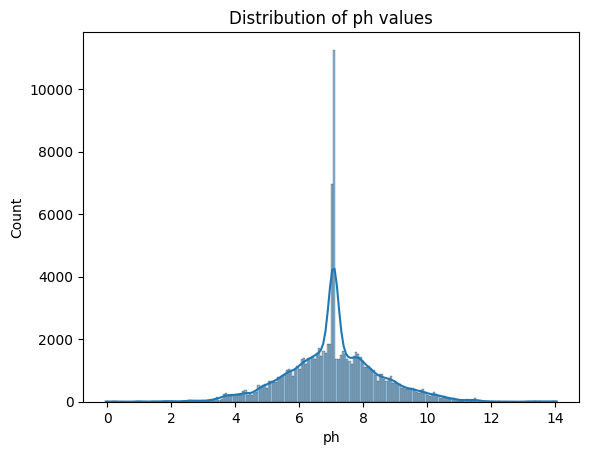

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['ph'], kde=True)
plt.title('Distribution of ph values')
plt.show()


A univariate plot, also known as a univariate analysis plot, is a graphical representation of data where only one variable is analyzed.

**2)Bi-variate Analysis**

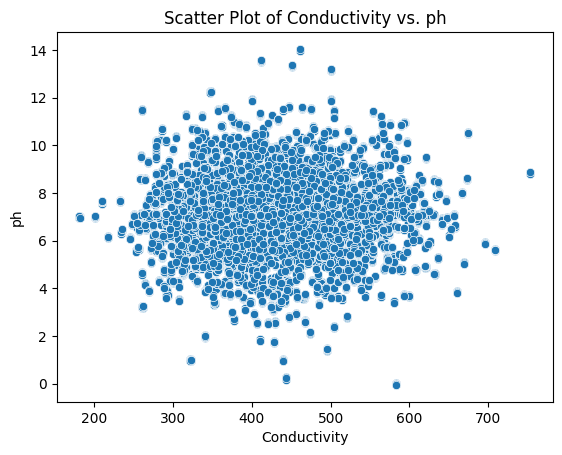

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="Conductivity", y="ph", data=df)
plt.title("Scatter Plot of Conductivity vs. ph")
plt.xlabel("Conductivity")
plt.ylabel("ph")
plt.show()

Bivariate analysis examines the relationship between two variables, helping us understand how they influence each other. There are several methods to perform bivariate analysis, depending on the type of data involved.such as Scatterplots,Correlation Coefficient,LinearRegression etc...

**3) Multivariate Analysis**

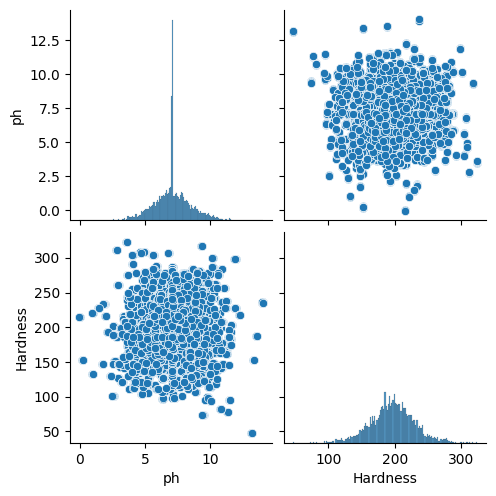

In [18]:

sns.pairplot(df[['ph', 'Hardness']])
plt.show()


"Multivariate" generally refers to involving multiple variables. In statistics and data analysis, multivariate techniques are used to understand the relationships between multiple variables and to analyze their combined effects here are some multivariate analysis commonly applied like Regression Analysis,Cluster Analysis etc.


**Heat Map**

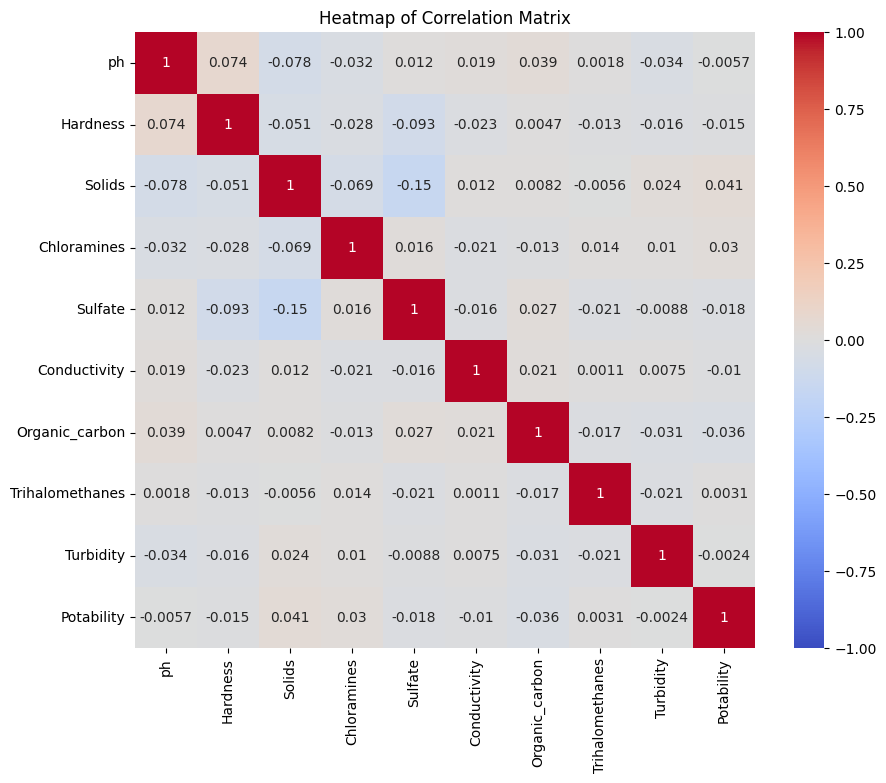

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap of Correlation Matrix")
plt.show()

A heatmap is a powerful visualization tool used to represent data points in a matrix-like format, where different values are depicted in varying colors to indicate intensity or magnitude. This makes patterns, correlations, and distributions within the data easier to interpret.

**Duplicate values**

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
100493,False
100494,False
100495,False
100496,False


**Treating the Outliers**

**Check the Outliers**

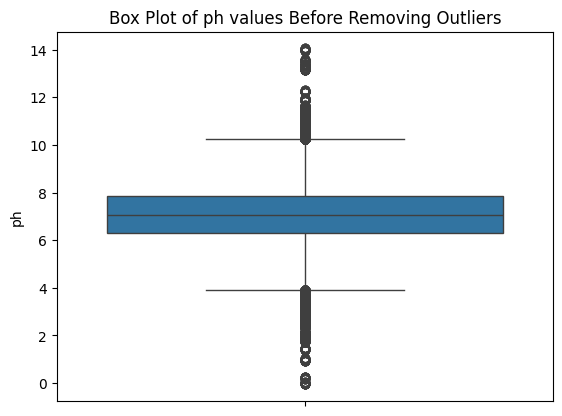

In [22]:

sns.boxplot(df['ph'])
plt.title('Box Plot of ph values Before Removing Outliers')
plt.show()


Checking for outliers is used to identifying data points that are significantly different from the rest of the data. In a box plot, outliers are represented as individual points that fall outside the whiskers of the plot. These points indicate values that are unusually high or low compared to the majority of the data.

**Remove Outliers**

In [23]:

Q1 = df['ph'].quantile(0.25)
Q3 = df['ph'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['ph'] < (Q1 - 1.5 * IQR)) | (df['ph'] > (Q3 + 1.5 * IQR)))]


In [24]:
Q1

np.float64(6.2870753739876974)

In [25]:
Q3

np.float64(7.863236442543505)

Removing outliers is used for identifying and excluding data points that are significantly different from the majority of the data. These outliers can skew results and mislead analyses. By removing them, you can ensure a more accurate representation of the data, leading to better insights and conclusions.

**Make the Box Plot Before and After the Outliers**

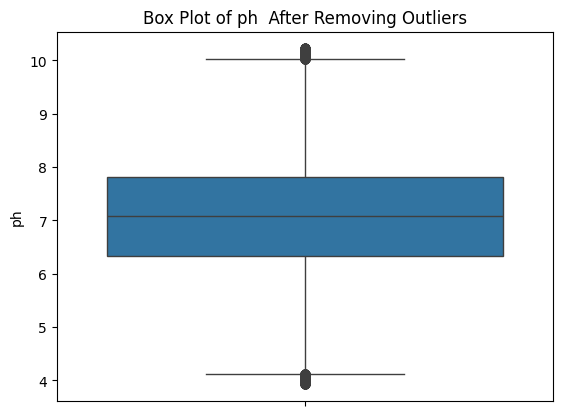

In [26]:

sns.boxplot(df['ph'])
plt.title('Box Plot of ph  After Removing Outliers')
plt.show()


Creating a box plot before and after removing outliers provides valuable insights into your data distribution

**Feature engineering**

Extract Features

In [27]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
100493,8.877281,246.101865,21178.737744,7.765320,343.078182,753.380312,16.941735,60.423472,3.091997,0
100494,7.278621,212.564507,38712.303513,5.798552,262.091710,332.442841,14.053881,70.343043,4.816059,0
100495,7.379448,267.665887,15815.433781,10.525736,333.737272,541.727616,13.361341,54.616800,4.730908,0
100496,6.778115,175.896429,21467.765391,7.103072,349.541131,427.190858,12.543752,55.262978,2.847829,0


In [28]:
df['New_Feature'] = df['Hardness'].astype(float) / df['ph'].astype(float)



<ipython-input-28-0e2e6239af31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New_Feature'] = df['Hardness'].astype(float) / df['ph'].astype(float)


Create Features



In [29]:

df['ph_Squared'] = df['ph'] ** 2


<ipython-input-29-5d7fa9c76637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph_Squared'] = df['ph'] ** 2


Select Features

In [30]:

features = ['ph', 'Hardness', 'Solids', 'New_Feature']
X = df[features]
y = df['ph']


In [31]:
X

,ph,Hardness,Solids,New_Feature
0,7.080795,204.890455,20791.318981,28.936083
2,8.099124,224.236259,19909.541732,27.686482
3,8.316766,214.373394,22018.417441,25.776053
4,9.092223,181.101509,17978.986339,19.918286
5,5.584087,188.313324,28748.687739,33.723210
...,...,...,...,...
100493,8.877281,246.101865,21178.737744,27.722661
100494,7.278621,212.564507,38712.303513,29.203954
100495,7.379448,267.665887,15815.433781,36.271806
100496,6.778115,175.896429,21467.765391,25.950640


In [32]:
y

,ph
0,7.080795
2,8.099124
3,8.316766
4,9.092223
5,5.584087
...,...
100493,8.877281
100494,7.278621
100495,7.379448
100496,6.778115


In [33]:
features

['ph', 'Hardness', 'Solids', 'New_Feature']

Check for Multicollinearity

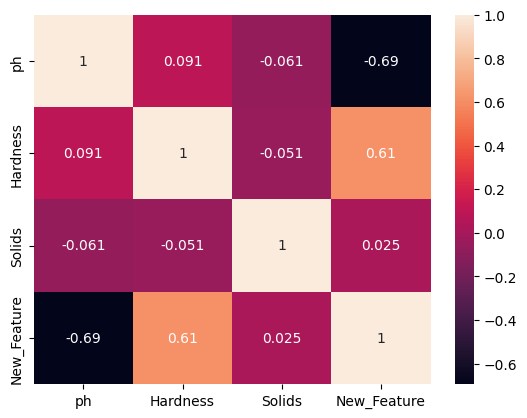

       feature         VIF
0           ph   44.027251
1     Hardness  152.155502
2       Solids    7.429750
3  New_Feature   60.504895


In [34]:

corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


Scaling

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = {
    'ph': [7.0, 7.2, 6.8],
    'Hardness': [180, 200, 150],
    'Solids': [20000, 21000, 19000],
    'Chloramines': [8, 8.2, 7.8],
    'Sulfate': [250, 260, 240],
    'Conductivity': [400, 410, 380],
    'Organic_carbon': [10, 9.8, 10.2],
    'Trihalomethanes': [80, 85, 75],
    'Turbidity': [5, 5.2, 4.8],
    'Potability': [1, 0, 1]
}
df = pd.DataFrame(data)

scaler = StandardScaler()
df['ph_scaled'] = scaler.fit_transform(df[['ph']])

print(df[['ph', 'ph_scaled']])


    ph  ph_scaled
0  7.0   0.000000
1  7.2   1.224745
2  6.8  -1.224745


**11)X-y Features Split**

In [36]:

X = df.drop('ph', axis=1)
y = df['ph']


In [37]:
y

,ph
0,7.0
1,7.2
2,6.8


**12)Train Test Split**

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [40]:


%%writefile app1.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load your dataset here
# Example: data = pd.read_csv('Water_Potability_Data.csv')
data = pd.read_csv('Water_Potability_Data.csv') # Assuming 'Water_Potability_Data.csv' is your dataset

# Handling missing values (if any)
data.fillna(data.median(), inplace=True)

# Define features and target
X = data.drop(columns=['Potability'])
y = data['Potability']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Function to make predictions
def predict_potability(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = clf.predict(input_df)
    return "Potable" if prediction[0] == 1 else "Not Potable"

# Streamlit app
st.title("Water Potability Prediction")

# Input fields
ph = st.number_input("pH", min_value=0.0, max_value=14.0, value=7.0)
Hardness = st.number_input("Hardness (mg/L)", min_value=0.0, max_value=500.0, value=150.0)
Solids = st.number_input("Solids (mg/L)", min_value=0.0, max_value=50000.0, value=20000.0)
Chloramines = st.number_input("Chloramines (ppm)", min_value=0.0, max_value=15.0, value=4.0)
Sulfate = st.number_input("Sulfate (mg/L)", min_value=0.0, max_value=500.0, value=250.0)
Conductivity = st.number_input("Conductivity (µS/cm)", min_value=0.0, max_value=1000.0, value=500.0)
Organic_carbon = st.number_input("Organic Carbon (ppm)", min_value=0.0, max_value=30.0, value=10.0)
Trihalomethanes = st.number_input("Trihalomethanes (ppm)", min_value=0.0, max_value=150.0, value=50.0)
Turbidity = st.number_input("Turbidity (NTU)", min_value=0.0, max_value=10.0, value=3.0)

# Prepare input data
input_data = {
    'ph': ph,
    'Hardness': Hardness,
    'Solids': Solids,
    'Chloramines': Chloramines,
    'Sulfate': Sulfate,
    'Conductivity': Conductivity,
    'Organic_carbon': Organic_carbon,
    'Trihalomethanes': Trihalomethanes,
    'Turbidity': Turbidity
}

# Predict button
if st.button("Predict"):
    result = predict_potability(input_data)
    st.write(f"Water Potability Prediction: {result}")

Writing app1.py


In [41]:
! wget -q -O - ipv4.icanhazip.com

34.150.146.53


In [ ]:
! streamlit run app1.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.146.53:8501

⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 